# Project: Identifying factors associated with show up on the appointments day using data from Brazilian hospitals.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The dataset provides the information medical history from Brazil with more than 100000 observation. Also, the data indicate how patients showed up on their respective appoitment day. During this analysis, different research questions will be answered such as the effect of age on the attending appoitment and identifying the potential categorical variables which affect on the showed up appoitment. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>In this section, missing values will be checked, duplicate will be identified and dropped out. Moreover, irrevelent variables, and values will be removed.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('C:\\Users\\MartinBarindirimana\\Downloads\\noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# About the data
>The dataset contain information from Brazilian 81 hospitals about 14 variables with 110527 obeservation without any missing values, from the point of view most of variables are integers. The hospitals in the dataset have 61744 patient, it can be seen that some patient had more than one appointment during the data collection period.

In [4]:
#  Checking if there are some missing values in data.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#Checking if there are some diuplicated rows;
sum(df.duplicated())

0

The information in the data set has no duplacate, which implies that each row contain the unique observation

In [6]:
# displaying all variables and few observations.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


According to the description of the data set, the mean and median of the age are approximately equal and also age has some issue as the minimum value is negatif, in normal sense it can not be negative.


### Data Cleaning
>As the age values can not be negatif, let all values that are less than zero be removed in data. The age values which is zero will be interpreted as the new born who are not yet celebrate first birthday. 

>Even the string variables will be removed in the dataset to remain with the ones that can be used in the analysis.

In [7]:
# Removing the negatif values of the age
df = df.drop(df[df.Age<0].index)

In [8]:
# Removing the unnecessary variables
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay', 'Neighbourhood'], axis = 1, inplace = True)
df.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


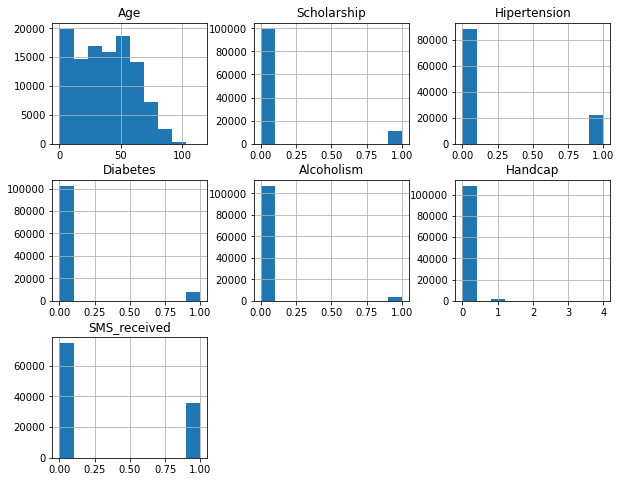

In [9]:
df.hist(figsize=(10,8));

In [10]:
# Explore the distribution of the age variable
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

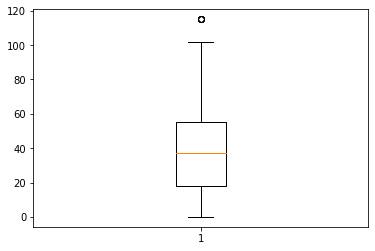

In [11]:
# Creating boxplot to check if there are outliers in age variable
plt.boxplot(df['Age'])
plt.show()

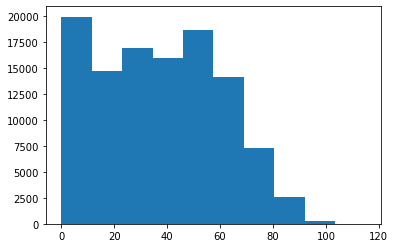

In [12]:
# Creating plot
plt.hist(df['Age'])
plt.show()

## Assumptions on age.
According to the both plots (Histogram and boxplot) variable age have some outliers, in my point of view most of the people died before celabrating $100^{th}$ birthay, so the age above 90 will be consiedered as an outliers and they will excluded from the data.

In [13]:
# removing age abova 90.
df = df.drop(df[df.Age>90].index)

In [14]:
df['Age'].describe()

count    110218.000000
mean         36.931617
std          22.948178
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          90.000000
Name: Age, dtype: float64

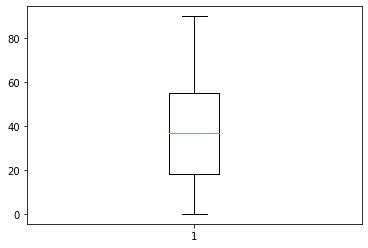

In [15]:
# Creating plot
plt.boxplot(df['Age'])
plt.show()

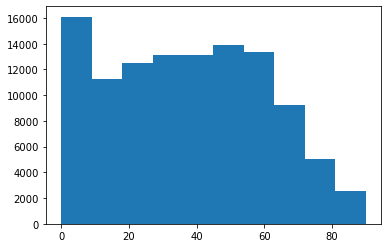

In [16]:
# Creating plot
plt.hist(df['Age'])
plt.show()

**After removing outliers from the age, still mean and median age are approximately equal which implies that the destribution is some how approximalety normal.** 

<a id='eda'></a>
## Exploratory Data Analysis

> Cross tabulation will be used to estimate distribution, Visualization using boxplot and bar plot to explore the effect of potential variables on mediacl appoitment.

### Research Question 1 (Is the person's age affect the show up on appoitment date)?

As the no show on appoitment variable has two categories and let split them into two separate variables.

In [17]:
No=df['No-show']=='No'
Yes=df['No-show']!='No'

In [18]:
df.Age[No].mean() # for those who show up on the day of appoitment.

37.635008697036184

In [19]:
df.Age[Yes].mean() # for those who did not show up on the day of appoitment.

34.151772476074946

Based on mean results, it is shown that the two mean are different, which means that in majority old people tend to do not miss the appoitment to go to hospital than the young one.

<AxesSubplot:xlabel='Age', ylabel='Density'>

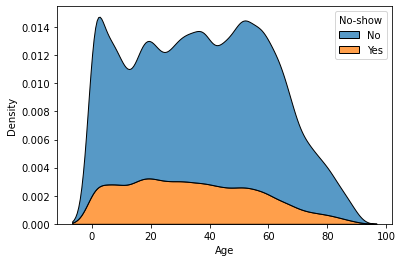

In [20]:
sns.kdeplot(data=df, x='Age',hue='No-show',multiple='stack')

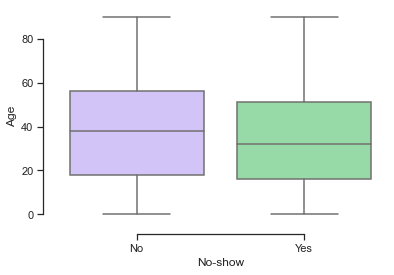

In [21]:
# Draw a boxplot to show age distribution by No show
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="No-show", y="Age",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

According to Figure above, there are shown that as people grow the probability to miss their appoitment increased, we can say that new born did not miss their appoitment due to their parent support. Form boxplot was indicated that the age distribution were not the sme in both categories of no show, even the majority in the patients were young compared to the elder patient.

### Research Question 2  (What are the potential variables influencing attending the appoitment)

1. Let check if gender has an effect on attending the medical appoitment.

In [22]:
# gender count for the distribution using cross tab.
pd.crosstab(index=df['Gender'], columns='count')

col_0,count
Gender,
F,71619
M,38599


In [23]:
# gender distribution according No showed up medical appoitment using cross tab.
pd.crosstab(index=df['Gender'], columns=df['No-show'])

No-show,No,Yes
Gender,,
F,57074,14545
M,30887,7712


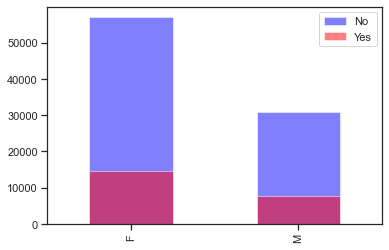

In [24]:
# Displaying the distribution of gender in different categories of no show up
df.Gender[No].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='No')
df.Gender[Yes].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='Yes')
plt.legend();

From the data, there are more female than male and even their distributions differ, as more female attend their appoitment than the males. From this gender influence how patients attending their appoitment day.

**Let exlpore if Scholarship has any association attending the medical appoitment.**

In [25]:
# Distribution of Scholarship.
pd.crosstab(index=df['Scholarship'], columns='count')

col_0,count
Scholarship,
0,99357
1,10861


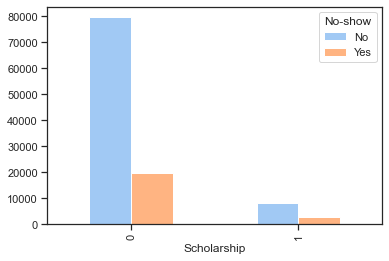

In [26]:
# Visualizing how Scholarship are distributed within no show up categories.
pd.crosstab(index=df['Scholarship'], columns=df['No-show']).plot.bar();

From the findings it is shown that, people with scholarship are more likely to show up on the appoitment day to the hospital than those without it.

**Let check if living with diseases have any association with attending the medical appoitment.**

In [27]:
pd.crosstab(index=df['Hipertension'], columns='count')

col_0,count
Hipertension,
0,88621
1,21597


<AxesSubplot:xlabel='Hipertension'>

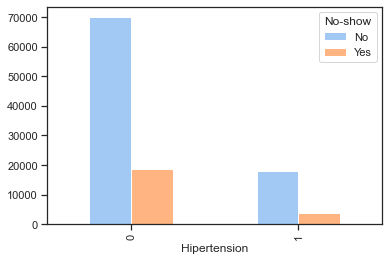

In [28]:
pd.crosstab(index=df['Hipertension'], columns=df['No-show']).plot.bar()

In [29]:
pd.crosstab(index=df['Diabetes'], columns='count')

col_0,count
Diabetes,
0,102307
1,7911


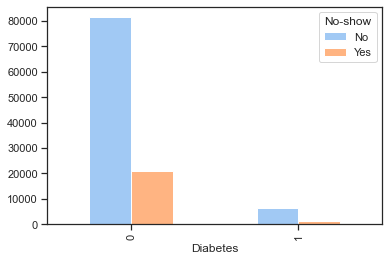

In [30]:
pd.crosstab(index=df['Diabetes'], columns=df['No-show']).plot.bar();

The results showed that, people with Diabete and Hipertension show up to the hospital on their appoitment day than other without them, and let check if there are association with their age.

In [31]:
# count the patients with both diseasas.
pd.crosstab(index=df['Diabetes'], columns=df['Hipertension'])

Hipertension,0,1
Diabetes,,
0,87168,15139
1,1453,6458


In [32]:
df.groupby('Diabetes').Age.mean(), df.groupby('Hipertension').Age.mean()

(Diabetes
 0    35.051736
 1    61.242700
 Name: Age, dtype: float64,
 Hipertension
 0    31.235057
 1    60.306848
 Name: Age, dtype: float64)

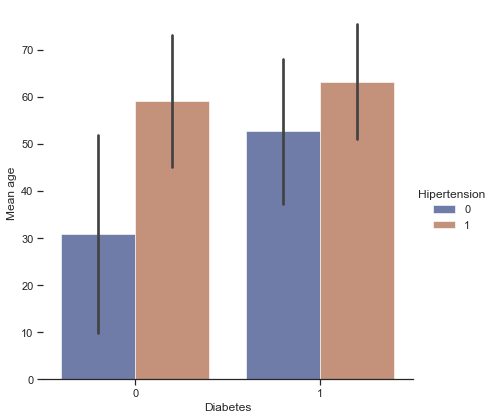

In [33]:
# Draw a nested barplot by SMS_received and Gender
g = sns.catplot(
    data=df, kind="bar",
    x="Diabetes", y="Age", hue="Hipertension",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Diabetes", "Mean age")
g.legend.set_title("Hipertension")

It is shown that on average old have linving with deseases. However, a large portion of the patients did not have both diseases at the time of the data collection.

**Let convert No-show into integer and compare gender distribution in receiving sms of medical appoitment**

In [34]:
# Rename the variable
df=df.rename(columns = {'No-show' : 'Noshow'})

In [35]:
# converting string variable into integer
df['No_show'] = np.where(df['Noshow'] <='No', 1,0)

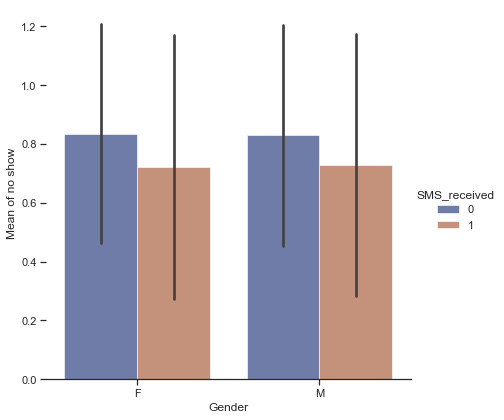

In [36]:
# Draw a nested barplot by SMS_received and Gender
g = sns.catplot(
    data=df, kind="bar",
    x="Gender", y="No_show", hue="SMS_received",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Gender", "Mean of no show")
g.legend.set_title("SMS_received")

It can be seen both distributions are similar on showing up on the hospital which means that both gender receive the sms on the same rate. Also, those who received sms had a chance of showing up on their appoitment date, since they got a remind from the hospital.

<a id='conclusions'></a>
## Conclusions

> The analysis was based on 11o218 collected from medical history in Brasil between April and June 2016. The dependent variable was no show up on appoitment and independent were patient's age, whether they live with disease (Hipertension and Diabetes), scholarship, and whether they receive sms.

> The distribution of age indicated that, on the majority as people get older tend to do not show up to the hospital at their appoitment date, while the young patient obey the appoitment. Moreover, the largest portion of them were newborn babies. Additionally, the female patients tend to show up at hospital on their appoitment more than males in the same group. Similarly the who ones who lived with deseases also attend their medical appoitment than their counter without deseases.

> The findings showed that both male and female receieved sms from the hospital at the same rate, as the ones who used to get those sms were more likely to show up on the appoitment day.

> In conclusion, it was notable that the distribution of gender, age of the patients, living with the different diseases were similar the one of no show on the appoitment. The results undersore the importance of send the reminder sms to the patients in motivating them to show up on the day of appoitment.

> As recommend, the more data are needed to explore and understand the reason behind no show up on the appoitment date. The dataset contain information on hospital location but there are not information patient location, it would be better if patients's location are added 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1